In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Copy of data2.txt'

In [19]:
data = pd.read_csv(data_path, header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [20]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

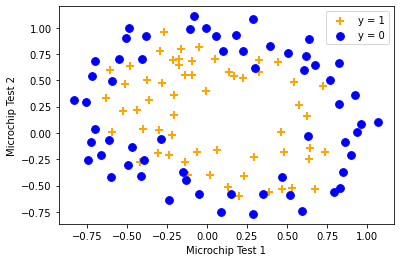

In [21]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [22]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
y = y.values

In [23]:
def mapFeature( x1col, x2col):
    degrees = 10
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [24]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 66)


In [25]:
from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

In [26]:

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 

    m = myy.size # number of training examples

    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [27]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [28]:
def compute_gradient_logistic(X, y, w):
  m,n = X.shape
  # print(m,n)
  dj_dw = np.zeros((n,))

  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i], w))                           #(n,)(n,)=scalar
    err_i  = f_wb_i  - y[i]                       #scalar
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err_i * X[i,j]        #scalar
  dj_dw = dj_dw/m                                   #(n,)
      
  return dj_dw

In [29]:
import copy
import math
def optimizeRegularizedTheta(mytheta, myX, myy, alpha, num_iters, mylambda=0.):
  m = myX.shape[0]
  jHistory = []
  w = copy.deepcopy(mytheta)

  for i in range(num_iters):
    dj_dw = compute_gradient_logistic(myX, myy, w)   

    w = w*(1-alpha*(mylambda/m)) - alpha * dj_dw              
  
    if i<100000: 
        jHistory.append( computeCost(w, myX, myy, mylambda) )

  return w, min(jHistory)

In [30]:
# from scipy import optimize
# initial_theta = np.zeros((XX.shape[1],1))
initial_theta = np.zeros(XX.shape[1])

    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.1, 500)
print(theta)
print(mincost)

[ 8.29446560e-01  3.51777057e-01  8.49960307e-01 -1.31704763e+00
 -4.86244266e-01 -6.66428810e-01  4.80812324e-02 -2.20903158e-01
 -2.31560396e-01 -4.09958640e-02 -9.84957381e-01 -4.75157464e-02
 -3.92763173e-01 -1.43918550e-01 -6.66962333e-01 -1.71998747e-01
 -1.37693042e-01 -5.77540430e-02 -1.66863095e-01 -1.74789959e-01
 -2.77223075e-01 -7.09079996e-01  2.54188648e-04 -1.96666087e-01
 -3.79821958e-03 -2.07183771e-01 -7.41607751e-02 -5.70374848e-01
 -2.47161354e-01 -7.51020209e-02 -4.30064009e-02 -7.30318669e-02
 -3.35351425e-02 -1.12398277e-01 -1.10795191e-01 -3.46326563e-01
 -5.29526803e-01  6.31868700e-03 -1.07723960e-01  2.76142234e-04
 -8.47211288e-02  6.24618200e-05 -1.26952339e-01 -4.56412040e-02
 -4.94428358e-01 -2.61516512e-01 -4.40792649e-02 -3.34257808e-02
 -3.16556747e-02 -1.90738993e-02 -4.29965838e-02 -1.51116816e-02
 -7.97497192e-02 -6.97785641e-02 -3.67917187e-01 -4.12992909e-01
  3.50766474e-03 -6.45396681e-02  5.26199991e-04 -3.90193901e-02
 -1.16735363e-03 -4.57246

In [31]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    alpha = .1
    iters = 500
    theta, mincost = optimizeRegularizedTheta(mytheta, myX, myy, alpha, iters, mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

[ 8.29446560e-01  3.51777057e-01  8.49960307e-01 -1.31704763e+00
 -4.86244266e-01 -6.66428810e-01  4.80812324e-02 -2.20903158e-01
 -2.31560396e-01 -4.09958640e-02 -9.84957381e-01 -4.75157464e-02
 -3.92763173e-01 -1.43918550e-01 -6.66962333e-01 -1.71998747e-01
 -1.37693042e-01 -5.77540430e-02 -1.66863095e-01 -1.74789959e-01
 -2.77223075e-01 -7.09079996e-01  2.54188648e-04 -1.96666087e-01
 -3.79821958e-03 -2.07183771e-01 -7.41607751e-02 -5.70374848e-01
 -2.47161354e-01 -7.51020209e-02 -4.30064009e-02 -7.30318669e-02
 -3.35351425e-02 -1.12398277e-01 -1.10795191e-01 -3.46326563e-01
 -5.29526803e-01  6.31868700e-03 -1.07723960e-01  2.76142234e-04
 -8.47211288e-02  6.24618200e-05 -1.26952339e-01 -4.56412040e-02
 -4.94428358e-01 -2.61516512e-01 -4.40792649e-02 -3.34257808e-02
 -3.16556747e-02 -1.90738993e-02 -4.29965838e-02 -1.51116816e-02
 -7.97497192e-02 -6.97785641e-02 -3.67917187e-01 -4.12992909e-01
  3.50766474e-03 -6.45396681e-02  5.26199991e-04 -3.90193901e-02
 -1.16735363e-03 -4.57246

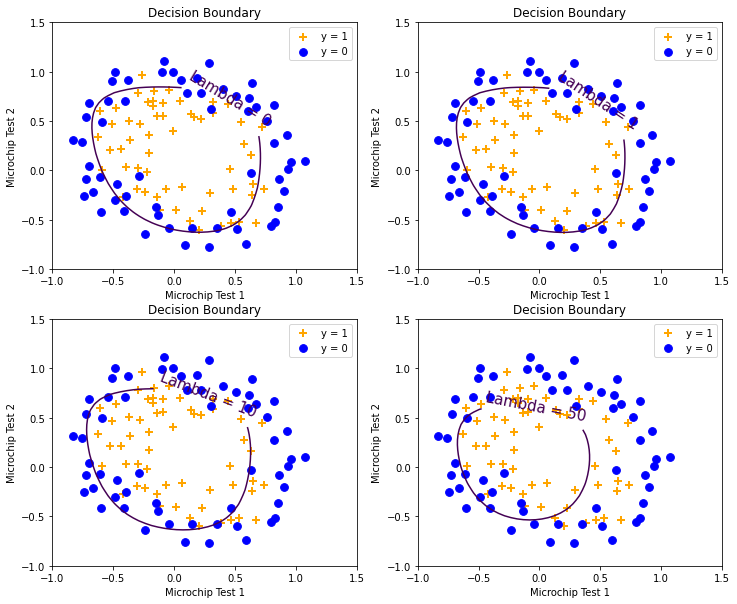

In [32]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)